## Passo 1 - Importar, Extrair e Criar Estrutura do Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp -r "/content/gdrive/MyDrive/UFOP/PDI/LCC_FASD.zip" "/content"

In [ ]:
import zipfile
archive = zipfile.ZipFile('/content/LCC_FASD.zip')
archive.extractall('/content')

In [ ]:
dataset_dir = '/content/LCC_FASD'
train_dataset_dir = '/content/LCC_FASD/train'
test_dataset_dir = '/content/LCC_FASD/val'

In [ ]:
import os

In [ ]:
train_dir = '/content/LCC_FASD/train'
test_dir = '/content/LCC_FASD/val'

## Passo 2 - Copiar as Imagens Para Nova Estrutura do Dataset

In [ ]:
import shutil
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Passo 3 - Informações do Dataset

In [ ]:
categories = ['real', 'spoof']

In [ ]:
print("------------------------Exploring Training Datasets---------------------------")
for category in categories:
  path = os.path.join(train_dir, category)
  if category == 'real':
    r1 = len(os.listdir(path))
  else:
    s1 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)), category))
print("There are {} total images in training directory".format(r1+s1))

print("------------------------Exploring Testing Datasets---------------------------")
for category in categories:
  path = os.path.join(test_dir, category)
  if category == 'real':
    r2 = len(os.listdir(path))
  else:
    s2 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)), category))
print("There are {} total images in testing directory".format(r2+s2))

------------------------Exploring Training Datasets---------------------------
There are 1223 images in real directory
There are 7076 images in spoof directory
There are 8299 total images in training directory
------------------------Exploring Testing Datasets---------------------------
There are 314 images in real directory
There are 7266 images in spoof directory
There are 7580 total images in testing directory


## Passo 4 - Visualização do Dataset

In [ ]:

def get_images(data_dir, number_of_samples):
  image_path = []
  for category in categories:
    path = os.path.join(data_dir, category)
    i = 1
    for img in os.listdir(path):
      if i > number_of_samples:
        continue
      else:
        image_path.append(os.path.join(path,img))
        i += 1
  return image_path

In [ ]:
def visualize_dataset(image_path, rows, cols):
  fig = plt.figure(figsize=(20,20))
  for i in range(1, rows * cols + 1):
    fig.add_subplot(rows, cols, i)
    img_array = cv2.imread(image_path[i-1])
    fig.subplots_adjust(hspace=1)
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
    plt.xlabel(image_path[i-1].split('/')[-2])
  plt.show()

In [ ]:
training_image_path = get_images(data_dir= train_dir, number_of_samples=25)
print(training_image_path)
print(len(training_image_path))

['/content/LCC_FASD/train/real/YOUTUBE_id89_s0_75.png', '/content/LCC_FASD/train/real/YOUTUBE_id97_s1_53.png', '/content/LCC_FASD/train/real/YOUTUBE_id51_s0_91.png', '/content/LCC_FASD/train/real/YOUTUBE_id31_s0_30.png', '/content/LCC_FASD/train/real/YOUTUBE_id68_s0_60.png', '/content/LCC_FASD/train/real/YOUTUBE_id68_s0_90.png', '/content/LCC_FASD/train/real/YOUTUBE_id101_s0_45.png', '/content/LCC_FASD/train/real/YOUTUBE_id38_s0_60.png', '/content/LCC_FASD/train/real/YOUTUBE_id70_s0_135.png', '/content/LCC_FASD/train/real/YOUTUBE_id73_s0_60.png', '/content/LCC_FASD/train/real/YOUTUBE_id65_s0_150.png', '/content/LCC_FASD/train/real/FT1080P_id165_s0_15.png', '/content/LCC_FASD/train/real/YOUTUBE_id46_s0_266.png', '/content/LCC_FASD/train/real/YOUTUBE_id40_s1_40.png', '/content/LCC_FASD/train/real/IPHONE8B_id82_s0_135.png', '/content/LCC_FASD/train/real/FT720P_id6_s0_60.png', '/content/LCC_FASD/train/real/YOUTUBE_id34_s0_177.png', '/content/LCC_FASD/train/real/YOUTUBE_id84_s0_120.png', '/

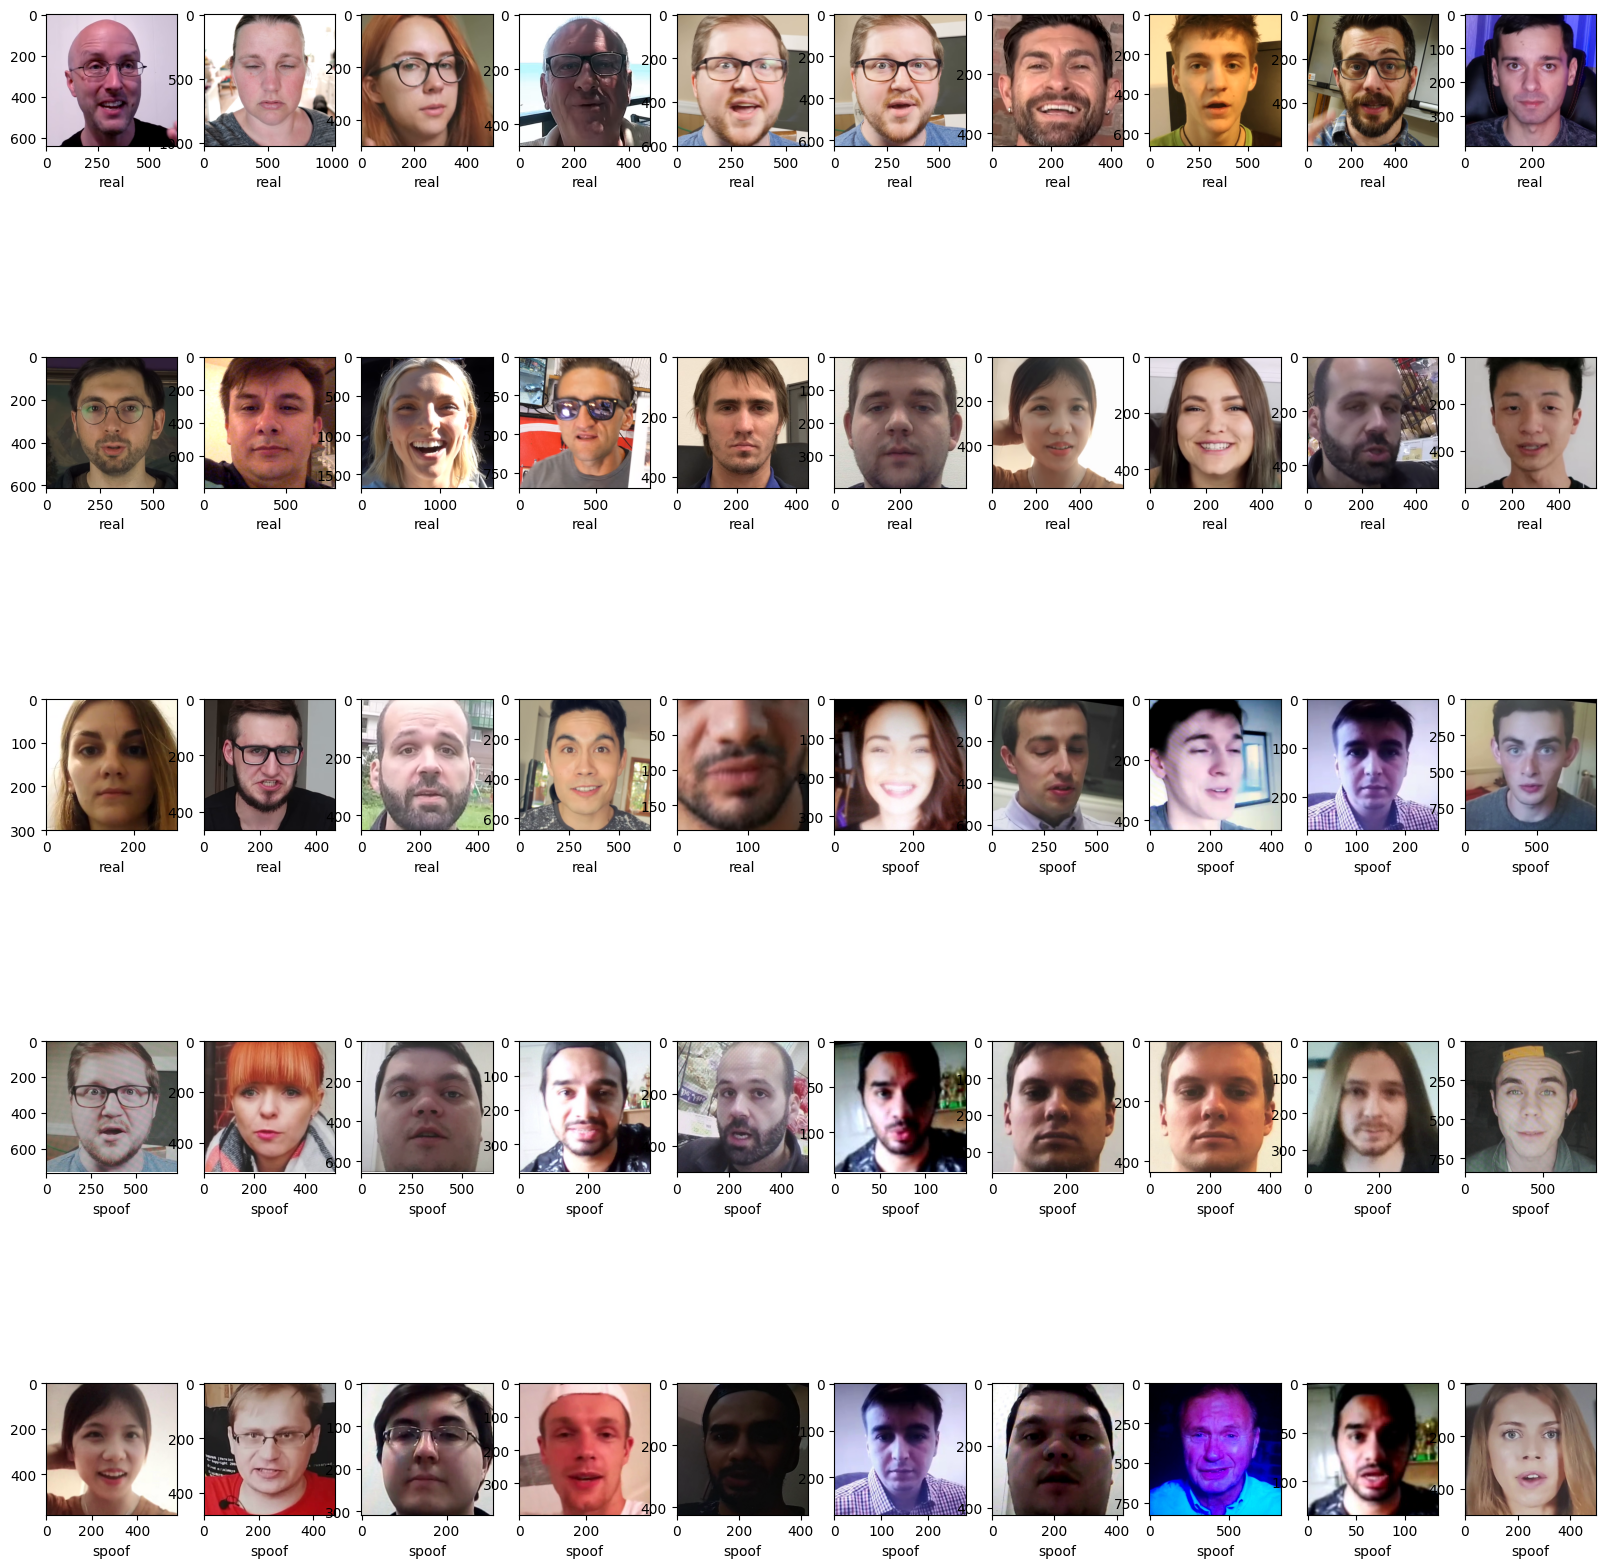

In [ ]:
visualize_dataset(image_path=training_image_path, rows=5, cols=10)

In [ ]:
testing_image_path = get_images(data_dir=test_dir, number_of_samples=25)
print(testing_image_path)
print(len(testing_image_path))

['/content/LCC_FASD/val/real/real_232.png', '/content/LCC_FASD/val/real/real_15.png', '/content/LCC_FASD/val/real/real_208.png', '/content/LCC_FASD/val/real/real_140.png', '/content/LCC_FASD/val/real/real_167.png', '/content/LCC_FASD/val/real/real_195.png', '/content/LCC_FASD/val/real/real_139.png', '/content/LCC_FASD/val/real/real_143.png', '/content/LCC_FASD/val/real/real_34.png', '/content/LCC_FASD/val/real/real_294.png', '/content/LCC_FASD/val/real/real_309.png', '/content/LCC_FASD/val/real/real_65.png', '/content/LCC_FASD/val/real/real_171.png', '/content/LCC_FASD/val/real/real_84.png', '/content/LCC_FASD/val/real/real_194.png', '/content/LCC_FASD/val/real/real_197.png', '/content/LCC_FASD/val/real/real_119.png', '/content/LCC_FASD/val/real/real_7.png', '/content/LCC_FASD/val/real/real_14.png', '/content/LCC_FASD/val/real/real_130.png', '/content/LCC_FASD/val/real/real_83.png', '/content/LCC_FASD/val/real/real_265.png', '/content/LCC_FASD/val/real/real_106.png', '/content/LCC_FASD

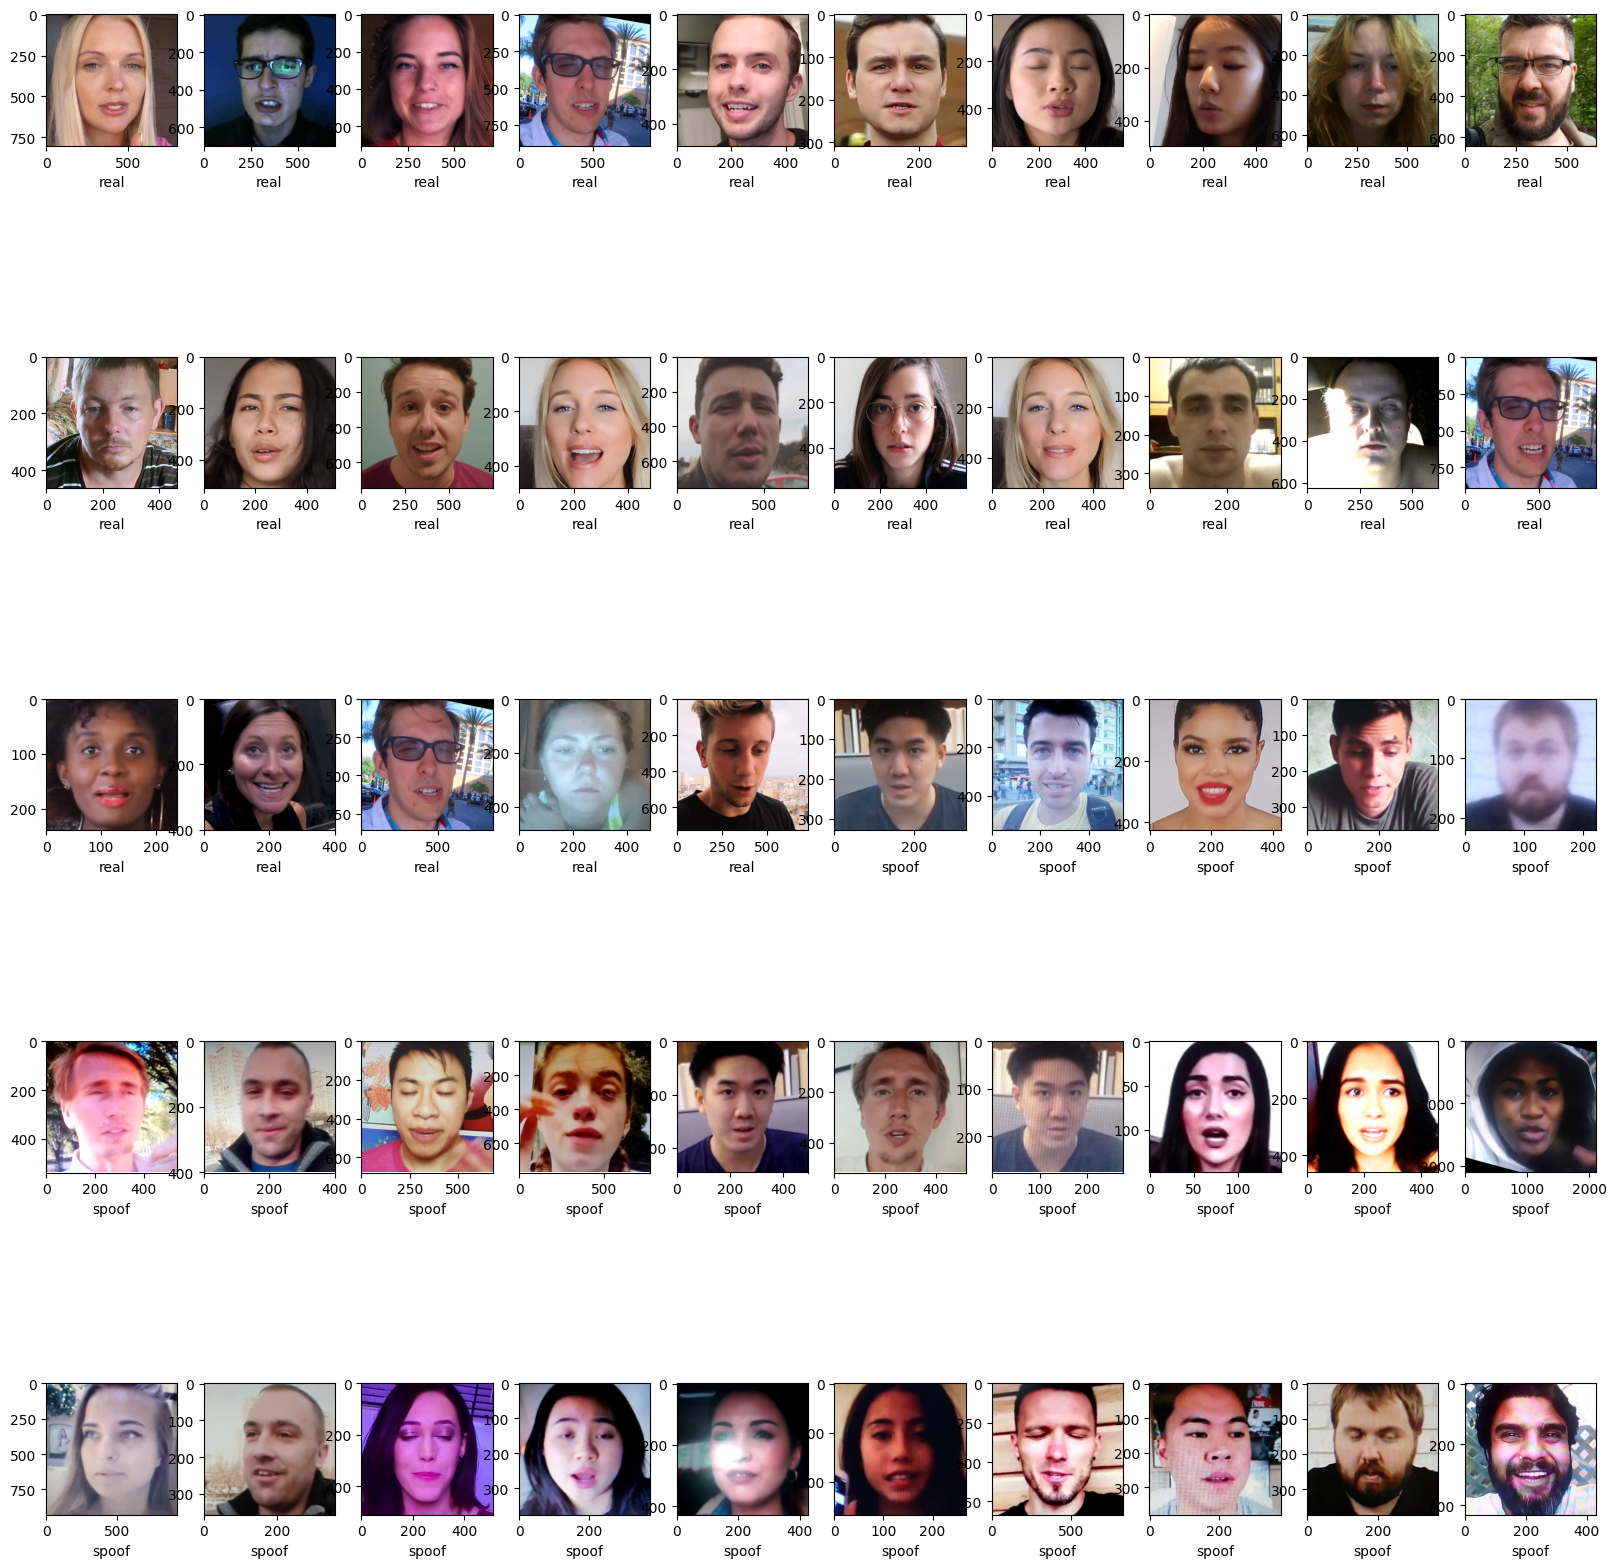

In [ ]:
visualize_dataset(image_path=testing_image_path, rows=5, cols=10)

# Preparação do Modelo Utilizando Framework Kera

In [ ]:
from keras.layers import Dense, Dropout, Input, Flatten, BatchNormalization
from keras.models import Model
from keras.models import model_from_json
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Reshape
import json

In [ ]:
train_datagen = ImageDataGenerator(
    horizontal_flip = True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    shear_range=0.15,
    zoom_range=0.15,
    rescale=1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='binary',
    batch_size=20,
    shuffle=True)

Found 8299 images belonging to 2 classes.


In [ ]:
valid_generator = valid_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='binary',
    batch_size=20)

Found 7580 images belonging to 2 classes.


## Passo 3 - Selecionando modelo e transferindo aprendizado

In [ ]:
mobilenet = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape= (128,128,3))

In [ ]:
mobilenet.trainable = False

In [ ]:
output = Flatten()(mobilenet.output)
output = Dropout(0.5)(output)
output = Dense(units=32, activation='relu')(output)
output = Dense(units=64, activation='relu')(output)

prediction = Dense(1, activation='sigmoid')(output)

In [ ]:
model = Model(inputs = mobilenet.input, outputs = prediction)
model.summary()

Model: "model_32"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_29 (InputLayer)       [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 64, 64, 32)           864       ['input_29[0][0]']            
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 64, 64, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 64, 64, 32)           0         ['bn_Conv1[0][0]']     

Passo 4 - Compilando o modelo

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(
        learning_rate=1e-4,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07
    ),
    metrics=['accuracy'],
 )

## Passo 5 - Configurando os checkpoints do modelo

In [ ]:
import os
os.mkdir('/content/model_weights/')

In [ ]:
model_checkpoint = ModelCheckpoint(
    './model_weights/finalyearproject_antispoofing_model_{epoch:02d}-{val_accuracy:.6f}.h5',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True,
    save_weights_only=True)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 21,
    validation_data = valid_generator,
    validation_steps = valid_generator.samples // 21,
    epochs = 10,
    callbacks=[model_checkpoint])

Epoch 1/10
395/395 [==============================] - ETA: 0s - loss: 0.3594 - accuracy: 0.8586
Epoch 1: val_loss improved from inf to 0.31380, saving model to ./model_weights/finalyearproject_antispoofing_model_01-0.895417.h5
395/395 [==============================] - 216s 538ms/step - loss: 0.3594 - accuracy: 0.8586 - val_loss: 0.3138 - val_accuracy: 0.8954
Epoch 2/10
395/395 [==============================] - ETA: 0s - loss: 0.2937 - accuracy: 0.8829
Epoch 2: val_loss did not improve from 0.31380
395/395 [==============================] - 211s 535ms/step - loss: 0.2937 - accuracy: 0.8829 - val_loss: 0.4069 - val_accuracy: 0.8082
Epoch 3/10
395/395 [==============================] - ETA: 0s - loss: 0.2746 - accuracy: 0.8880
Epoch 3: val_loss improved from 0.31380 to 0.20110, saving model to ./model_weights/finalyearproject_antispoofing_model_03-0.924583.h5
395/395 [==============================] - 211s 536ms/step - loss: 0.2746 - accuracy: 0.8880 - val_loss: 0.2011 - val_accuracy: 0

# Realizando testes e análises

## Plotando gráficos de acurácia e perda do treinamento

In [ ]:
import matplotlib.pyplot as plt

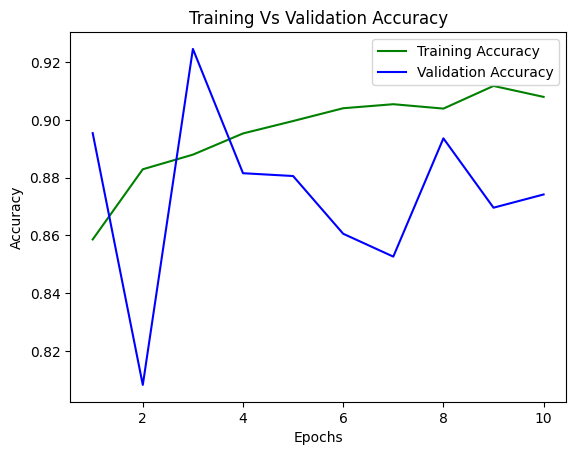

In [ ]:
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, train_accuracy, 'g', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

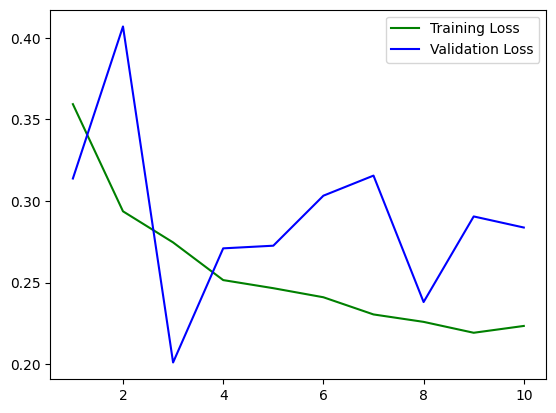

In [ ]:
train_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, 11)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.legend()
plt.show()